In [1]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json

In [2]:
# Import data 
# Note: Please change directory path to where the file is located.
directory = 'F:/HoMan Chan/Others/'

df = pd.read_csv(directory + 'Companies.csv')

# Understanding the Data

In [3]:
df.head(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,151.60,2487210213376,1.306340e+11,0.086,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.078540
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,251.90,1891260039168,9.498300e+10,0.184,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.059721
2,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,776.58,779888230400,1.270200e+10,0.805,Austin,TX,United States,99290.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024627
3,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance—Diversified,285.31,638886084608,1.255810e+11,0.115,Omaha,NE,United States,372000.0,"Berkshire Hathaway Inc., through its subsidiar...",0.020174
4,NYQ,UNH,UnitedHealth Group Incorporated,UnitedHealth Group Incorporated,Healthcare,Healthcare Plans,531.59,500678590464,2.639100e+10,0.142,Minnetonka,MN,United States,350000.0,UnitedHealth Group Incorporated operates as a ...,0.015810


In [4]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,493.000000,4.930000e+02,4.630000e+02,492.000000,4.910000e+02,493.000000
mean,162.398884,6.423573e+10,6.055417e+09,0.528150,5.540377e+04,0.002028
std,262.710729,1.588148e+11,1.305708e+10,3.837191,1.458281e+05,0.005015
min,8.500000,4.060800e+09,-4.011000e+09,-0.454000,1.050000e+02,0.000128
25%,58.250000,1.599014e+10,1.285896e+09,0.047000,9.514000e+03,0.000505
50%,102.500000,2.882696e+10,2.565300e+09,0.113000,1.930000e+04,0.000910
75%,193.070000,6.070308e+10,5.302000e+09,0.221250,5.315000e+04,0.001917
max,4360.020000,2.487210e+12,1.306340e+11,61.423000,2.300000e+06,0.078540


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             493 non-null    object 
 1   Symbol               493 non-null    object 
 2   Shortname            493 non-null    object 
 3   Longname             493 non-null    object 
 4   Sector               493 non-null    object 
 5   Industry             493 non-null    object 
 6   Currentprice         493 non-null    float64
 7   Marketcap            493 non-null    int64  
 8   Ebitda               463 non-null    float64
 9   Revenuegrowth        492 non-null    float64
 10  City                 493 non-null    object 
 11  State                474 non-null    object 
 12  Country              493 non-null    object 
 13  Fulltimeemployees    491 non-null    float64
 14  Longbusinesssummary  493 non-null    object 
 15  Weight               493 non-null    flo

- There are missing values in some of the fields e.g. Ebitda, State and Fulltimeemployees.

In [6]:
df['Sector'].unique()

array(['Technology', 'Consumer Cyclical', 'Financial Services',
       'Healthcare', 'Energy', 'Consumer Defensive',
       'Communication Services', 'Industrials', 'Utilities',
       'Basic Materials', 'Real Estate'], dtype=object)

# Problem 1
### Part 1

In [7]:
# Take mean on Ebitda by sector
avg_ebitda = df.groupby('Sector')['Ebitda'].mean()

df_avg_ebitda = pd.DataFrame(avg_ebitda.sort_values(ascending=False))

print(df_avg_ebitda)

                              Ebitda
Sector                              
Communication Services  1.835430e+10
Energy                  1.013750e+10
Financial Services      7.604851e+09
Technology              7.073187e+09
Healthcare              6.441586e+09
Consumer Defensive      6.061835e+09
Basic Materials         4.682973e+09
Consumer Cyclical       4.184057e+09
Utilities               4.150506e+09
Industrials             3.312536e+09
Real Estate             1.833313e+09


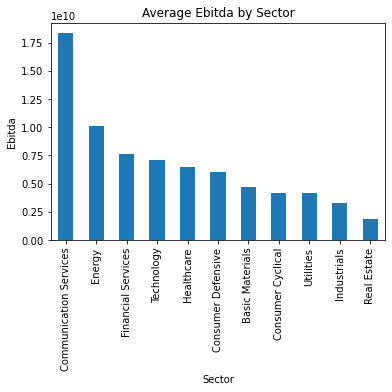

In [8]:
# Bar plot
df_avg_ebitda.plot(kind='bar', legend=None)

plt.ylabel('Ebitda')
plt.title('Average Ebitda by Sector')

plt.show()

In [9]:
# Subset data of communication services sector
comm = df[df['Sector']=='Communication Services']

# Take mean on Ebitda by industry
avg_ebitda = comm.groupby('Industry')['Ebitda'].mean()

df_avg_ebitda = pd.DataFrame(avg_ebitda.sort_values(ascending=False))

# Work out Ebitda proportions by industry
df_avg_ebitda['Ebitda_Prop.'] = df_avg_ebitda['Ebitda'] * 100 / df_avg_ebitda['Ebitda'].sum()

print(df_avg_ebitda)

                                      Ebitda  Ebitda_Prop.
Industry                                                  
Internet Content & Information  4.828942e+10     48.010539
Telecom Services                3.350950e+10     33.315977
Entertainment                   1.283815e+10     12.764010
Broadcasting                    2.129000e+09      2.116705
Advertising Agencies            2.036125e+09      2.024366
Electronic Gaming & Multimedia  1.778675e+09      1.768403


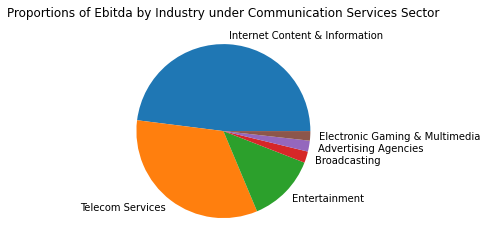

In [10]:
# Pie chart
df_avg_ebitda.plot.pie(y='Ebitda_Prop.', legend=None)

plt.ylabel('')
plt.title('Proportions of Ebitda by Industry under Communication Services Sector')
                       
plt.show()

- Communication Services is the sector recorded the highest average EBITDA (~18.4bn), that is 1.8 times higher than Energy.
- Internet Content & Information is the biggest contributor, with 48% of the average EBITDA generated from there. The trending of social media such as Twitter plays no small part of the outstanding financial performance of this sector.

In [11]:
# Subset 'Technology'
tech = df[df['Sector']=='Technology']

# Take mean on current price by industry
avg_price = tech.groupby('Industry')['Currentprice'].mean()

df_avg_price = pd.DataFrame(avg_price.sort_values(ascending=False))

print(df_avg_price)

                                     Currentprice
Industry                                         
Solar                                  256.290000
Semiconductor Equipment & Materials    247.550000
Software—Application                   231.852727
Software—Infrastructure                177.153000
Semiconductors                         160.989286
Information Technology Services        158.656667
Scientific & Technical Instruments     155.234000
Consumer Electronics                   151.600000
Communication Equipment                127.384000
Electronic Components                   75.840000
Computer Hardware                       65.530000


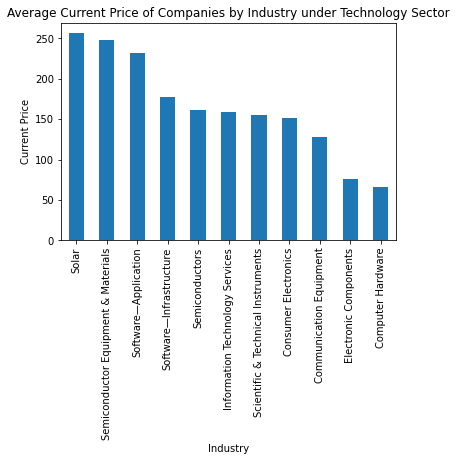

In [12]:
# Bar plot
df_avg_price.plot(kind='bar', legend=None)

plt.ylabel('Current Price')
plt.title('Average Current Price of Companies by Industry under Technology Sector')

plt.show()

- The average current price of companies of Software Infrastructure is higher than that of Consumer Electronics.
- Given the prominence of big data and AI, increasing number of enterprises turned to cloud and cybersecurity services. The financial value of software infrastructure companies (and their assets such as data centre) grow, which put them ahead of consumer electronics companies.      

E:\Anaconda3\envs\HMC_env\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


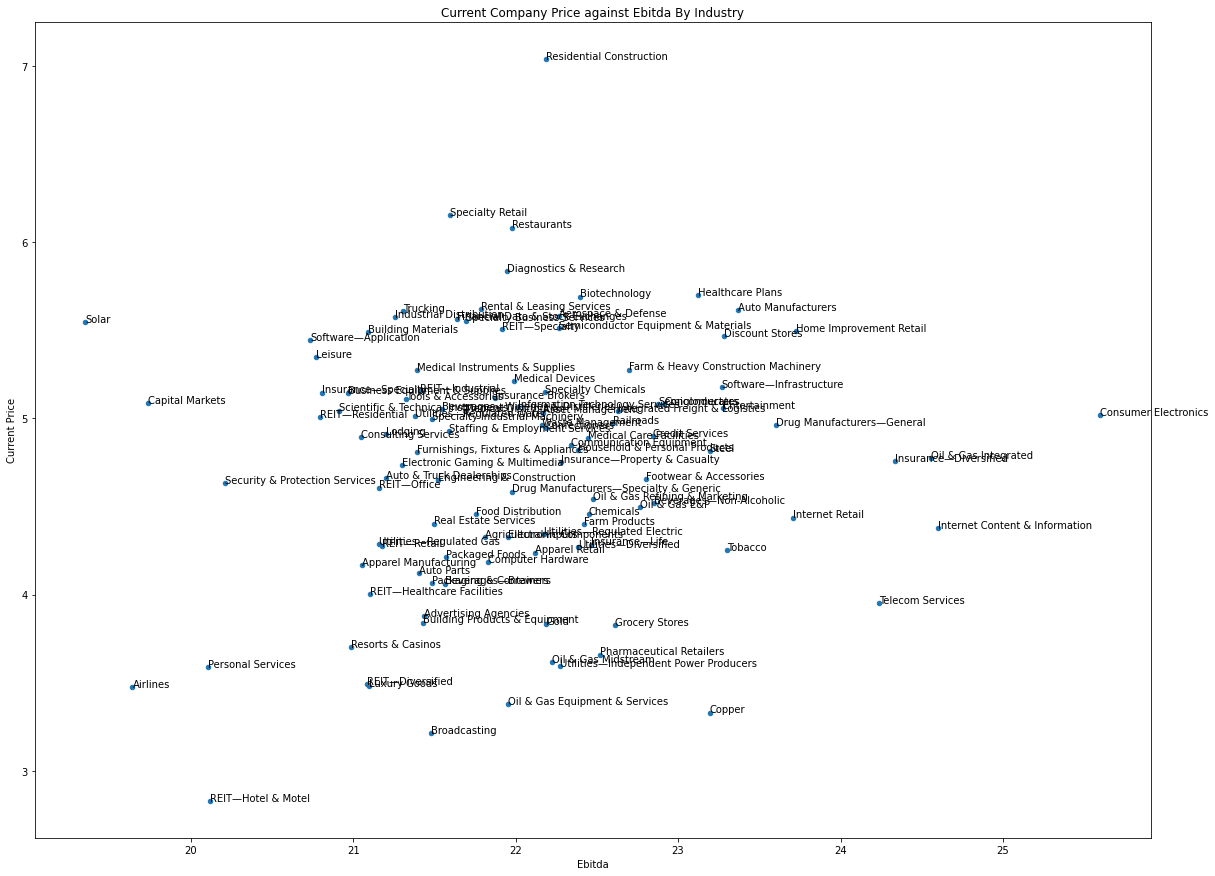

In [13]:
# Take mean on current price by industry
avg_price = df.groupby('Industry')['Currentprice'].mean()
df_avg_price = pd.DataFrame(avg_price.sort_values(ascending=False))

# Take mean on Ebitda by industry
avg_ebitda = df.groupby('Industry')['Ebitda'].mean()
df_avg_ebitda = pd.DataFrame(avg_ebitda.sort_values(ascending=False))

df_combine = df_avg_price.join(df_avg_ebitda, on='Industry')

# Log transformation for better scaling 
log_df = np.log(df_combine)
log_df1=log_df.reset_index()

#Scatter Plot
ax = log_df1.plot.scatter(y='Currentprice', x='Ebitda', figsize=(20,15))

for idx, row in log_df1.iterrows():
    ax.annotate(row['Industry'], (row['Ebitda'], row['Currentprice']))
    
plt.ylabel('Current Price')
plt.xlabel('Ebitda')
plt.title('Current Company Price against Ebitda By Industry')

plt.show()

- It is interesting to see if there is correlation between current price of companies and EBITDA, so I plotted a scatter plot to put the 2 features against each other with each data point represents an industry.
- The chart shows that there was a strong (positive) correlation between the two features. This means current price is an important feature when it came to predicting EBITDA in a regression model.
- The bottom right corner of the chart is where companies of the industry had performed well but with a low financial value. Companies of industry such as Telecom Services, Internet Retail, and Internet Content & Information have high ceiling for growth.    

# Problem 2
### Part 1

In [14]:
# Connect to Frankfurter api (Source: "https://github.com/hakanensari/frankfurter")
reponse_api = requests.get('https://api.frankfurter.app/latest')

In [15]:
# Pull data from api and parse into json format
data = reponse_api.text

df = pd.DataFrame(json.loads(data))

df = df.reset_index()

print(df)

   index  amount base        date        rates
0    AUD     1.0  EUR  2024-03-27      1.66000
1    BGN     1.0  EUR  2024-03-27      1.95580
2    BRL     1.0  EUR  2024-03-27      5.39690
3    CAD     1.0  EUR  2024-03-27      1.47120
4    CHF     1.0  EUR  2024-03-27      0.98110
5    CNY     1.0  EUR  2024-03-27      7.81820
6    CZK     1.0  EUR  2024-03-27     25.31900
7    DKK     1.0  EUR  2024-03-27      7.45820
8    GBP     1.0  EUR  2024-03-27      0.85768
9    HKD     1.0  EUR  2024-03-27      8.46150
10   HUF     1.0  EUR  2024-03-27    395.40000
11   IDR     1.0  EUR  2024-03-27  17194.00000
12   ILS     1.0  EUR  2024-03-27      3.95820
13   INR     1.0  EUR  2024-03-27     90.13000
14   ISK     1.0  EUR  2024-03-27    149.90000
15   JPY     1.0  EUR  2024-03-27    163.52000
16   KRW     1.0  EUR  2024-03-27   1461.31000
17   MXN     1.0  EUR  2024-03-27     17.93670
18   MYR     1.0  EUR  2024-03-27      5.11920
19   NOK     1.0  EUR  2024-03-27     11.68250
20   NZD     

In [16]:
# Subset data of the 10 currencies
curr_extract = ['AUD', 'CAD', 'CHF', 'CNY', 'DKK', 'HKD', 'JPY', 'NZD', 'THB', 'USD']
df_curr = df[df['index'].isin(curr_extract)].reset_index()

# Get GBP exchange rate and use it to convert the 10 currencies
gbp = df.iloc[8, 4]
df_curr['Currency_To_Value'] = gbp / df_curr['rates']

# Tidy up the dataframe
df_curr['Rate Type'] = 'Spot rate'
df_curr['Currency_From_Value'] = 1
df_curr['Currency_To'] = 'GBP'
df_inGBP = df_curr[['Rate Type', 'date', 'index', 'Currency_From_Value', 'Currency_To', 'Currency_To_Value']]
df_inGBP_rename = df_inGBP.rename(columns={'date':'Date', 'index':'Currency_From'})

print(df_inGBP_rename)

# Export to csv
df_inGBP_rename.to_csv(directory + 'problem2_part1.csv', index=False)

   Rate Type        Date Currency_From  Currency_From_Value Currency_To  \
0  Spot rate  2024-03-27           AUD                    1         GBP   
1  Spot rate  2024-03-27           CAD                    1         GBP   
2  Spot rate  2024-03-27           CHF                    1         GBP   
3  Spot rate  2024-03-27           CNY                    1         GBP   
4  Spot rate  2024-03-27           DKK                    1         GBP   
5  Spot rate  2024-03-27           HKD                    1         GBP   
6  Spot rate  2024-03-27           JPY                    1         GBP   
7  Spot rate  2024-03-27           NZD                    1         GBP   
8  Spot rate  2024-03-27           THB                    1         GBP   
9  Spot rate  2024-03-27           USD                    1         GBP   

   Currency_To_Value  
0           0.516675  
1           0.582980  
2           0.874202  
3           0.109703  
4           0.114998  
5           0.101363  
6           0

### Part 2

In [17]:
# Take average on the conversion rate i.e. values in GBP
conv = df_inGBP_rename['Currency_To_Value'].mean()

# Format for appending later
data = [['Grand_Average', 'GBP', conv]]
df1 = pd.DataFrame(data, columns=['Currency_From', 'Currency_To', 'Currency_To_Value'])

In [18]:
# Find highest & lowest value vs. GBP by looking at conversion rates 
highest = df_inGBP_rename['Currency_To_Value'].max()
lowest = df_inGBP_rename['Currency_To_Value'].min()

print('Currency with the highest value against GBP: ', df_inGBP_rename[df_inGBP_rename['Currency_To_Value']==highest][['Currency_From']].values[0])
print('Currency with the lowest value against GBP: ', df_inGBP_rename[df_inGBP_rename['Currency_To_Value']==lowest][['Currency_From']].values[0])

Currency with the highest value against GBP:  ['CHF']
Currency with the lowest value against GBP:  ['JPY']


In [19]:
df2 = df_inGBP_rename[df_inGBP_rename['Currency_To_Value']==highest][['Currency_From', 'Currency_To', 'Currency_To_Value']]
df3 = df_inGBP_rename[df_inGBP_rename['Currency_To_Value']==lowest][['Currency_From', 'Currency_To', 'Currency_To_Value']]

# Append highest, lowest, and average
df4 = pd.concat([df2, df3, df1], axis=0)

# Add new column - actual value against GBP 
df4['Against_GBP_Value'] = 1 / df4['Currency_To_Value']

print(df4)

#Export to csv
df4.to_csv(directory + 'problem2_part2.csv', index=False)

   Currency_From Currency_To  Currency_To_Value  Against_GBP_Value
2            CHF         GBP           0.874202           1.143900
6            JPY         GBP           0.005245         190.653857
0  Grand_Average         GBP           0.359527           2.781431
